In [17]:
import os
folders = os.listdir(r"C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\20_newsgroups")

In [18]:
# !pip install wordcloud

In [19]:
import nltk
import json
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import STOPWORDS
ps = PorterStemmer()

In [20]:
# print(len(STOPWORDS))
stops = set(stopwords.words('english'))
for i in stops:
    STOPWORDS.add(i)
# STOPWORDS.add(stopwords.words('english'))
# STOPWORDS.union(stops)
print(len(STOPWORDS))

221


In [21]:
# words = set()
word_dic = {}
freq_dic = {}
count_to_file = {}
file_to_count = {}
count = 0

for folder in folders:    
    path = os.path.join(r"C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\20_newsgroups", folder)
    
    files_list = os.listdir(path)
    
    for file in files_list:
        count += 1
        path2 = os.path.join(path, file)
        
        file_to_count[path2] = count
        count_to_file[count] = path2
        
        f = open(path2)
        for line in f:
            w = tokenizer.tokenize(line) #tokenizer
            wo = [ps.stem(i) for i in w] #stemmer
            for i in wo:
#                 print(i)
                i = i.strip()
                i = i.lower()
                if (len(i) > 1 and i not in STOPWORDS): #stop words removal
#                     for punct in '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'': #punctation marks removal
#                         i = i.replace(punct, '')
#                         words.add(i)
                    if (i not in word_dic):
#                         if (i == ''):
#                             print('yo')
#                             exit(0)
                        word_dic[i] = set()
                        freq_dic[i] = 0
                    word_dic[i].add(count)
                    freq_dic[i] += 1

#         break
#     break
# print(word_dic)
# print(words)
#     print(len(words))
    print(len(word_dic))

15086
27724
76431
83412
89293
103864
110851
116536
121666
126283
131808
138623
143295
150561
156662
160719
167643
175774
181274
184507


In [22]:
for i in word_dic:
    word_dic[i] = sorted(word_dic[i])
# print(dic['main'])

In [23]:
k = sorted(word_dic.keys())

In [24]:
k[80000:80200]

['c78lve',
 'c78u6q',
 'c79',
 'c79_ra',
 'c79abh',
 'c79yka',
 'c7_b',
 'c7a',
 'c7a4',
 'c7a5bg',
 'c7abh9',
 'c7afvwr9',
 'c7b',
 'c7bljr',
 'c7boj',
 'c7c',
 'c7c14z',
 'c7c4c7',
 'c7c63h',
 'c7dy0o',
 'c7dy8',
 'c7e',
 'c7e3dh',
 'c7f',
 'c7ff',
 'c7fpal',
 'c7ge5f',
 'c7h',
 'c7i',
 'c7jc',
 'c7jv1b',
 'c7jvih',
 'c7jvwr',
 'c7k',
 'c7ke',
 'c7kf4m',
 'c7n',
 'c7n6',
 'c7ng4vk',
 'c7p',
 'c7phf',
 'c7qx',
 'c7tdm',
 'c7v',
 'c7w',
 'c7wq1',
 'c7wyvjnr',
 'c7x',
 'c7x3',
 'c7ym',
 'c7z',
 'c8',
 'c800',
 'c803k',
 'c809',
 'c81',
 'c813qm',
 'c82',
 'c82_382',
 'c82_38v',
 'c82va',
 'c833',
 'c84',
 'c844',
 'c845',
 'c84hm2',
 'c84i',
 'c85',
 'c86xg',
 'c86xn7',
 'c89',
 'c89_6r',
 'c8_',
 'c8a',
 'c8bjdk9a',
 'c8d',
 'c8d4',
 'c8e',
 'c8ecp',
 'c8efu',
 'c8eg',
 'c8emas',
 'c8emc',
 'c8fj',
 'c8h',
 'c8hoz',
 'c8j',
 'c8j0ji0',
 'c8moz',
 'c8o0v',
 'c8p8_o',
 'c8pjupykvi8abrg0i01hcmmgvghpymf1bhqg',
 'c8pn8d',
 'c8rb',
 'c8rck',
 'c8rd',
 'c8rlho',
 'c8rlhz',
 'c8rli',
 'c8rlk',

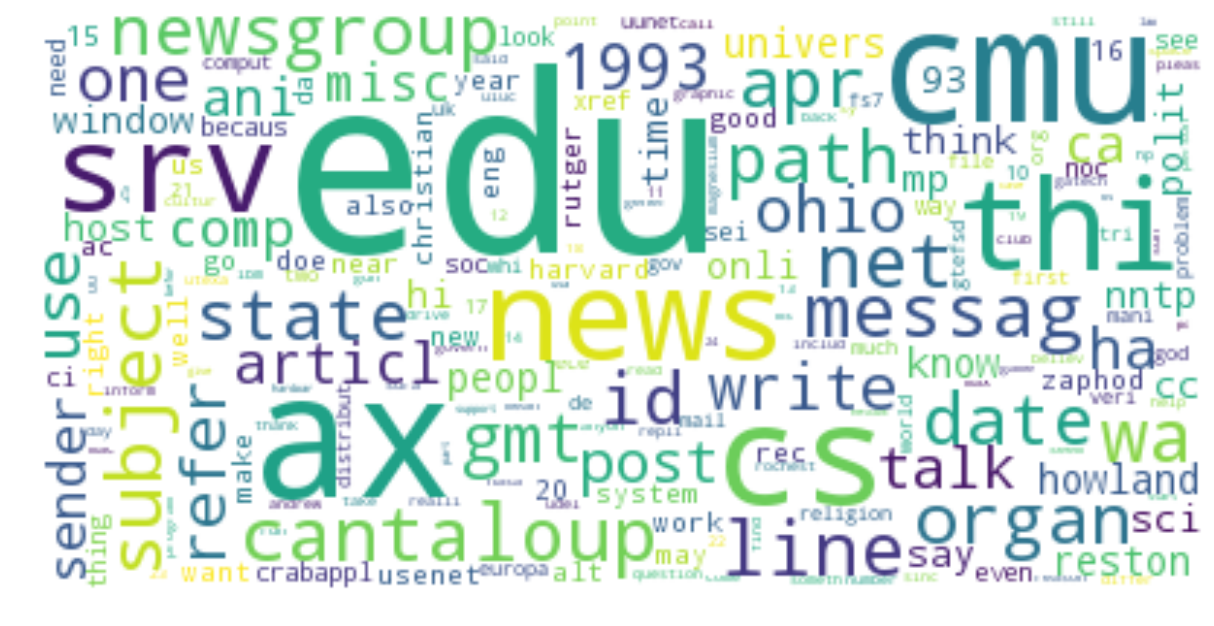

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',ranks_only=True).generate_from_frequencies(freq_dic)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
wordcloud.to_file(os.path.join(r"C:\Users\Sanidhya\Documents\IR_HW_1\Dataset", "cloud.png"))

In [27]:
fp = open(r"C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\data.json", 'w+')
json.dump(word_dic, fp, sort_keys=True)
fp.close()

fp = open(r"C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\count_to_file.json", 'w+')
json.dump(count_to_file, fp, sort_keys=True)
fp.close()

fp = open(r"C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\file_to_count.json", 'w+')
json.dump(file_to_count, fp, sort_keys=True)
fp.close()

fp = open(r"C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\freq_dic.json", 'w+')
json.dump(freq_dic, fp, sort_keys=True)
fp.close()


In [28]:
fp = open(r"C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\data.json", 'r')
a = json.load(fp)
fp.close()
# print(a['main'])

fp = open(r"C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\count_to_file.json", 'r')
count_to_file = json.load(fp)
fp.close()

fp = open(r"C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\file_to_count.json", 'r')
file_to_count = json.load(fp)
fp.close()

fp = open(r"C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\freq_dic.json", 'r')
freq_dic = json.load(fp)
fp.close()

In [31]:
uniq_freq = set(freq_dic.values())
inv_freq_dic = {}
for i in uniq_freq:
    inv_freq_dic[i] = ''
    
for j in inv_freq_dic:
    for i in freq_dic:
        if(freq_dic[i] == j):
            inv_freq_dic[j] = i
            break

In [32]:
# inv_freq_dic['784']

In [33]:
fp = open(r"C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\inv_freq_dic.json", 'w+')
json.dump(inv_freq_dic, fp, sort_keys=True)
fp.close()

In [34]:
fp = open(r"C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\inv_freq_dic.json", 'r')
inv_freq_dic = json.load(fp)
fp.close()

In [35]:
# inv_freq_dic['123']

In [52]:
import statistics
highest = print(max(uniq_freq))
avg = print(statistics.mean(uniq_freq))
med = print(statistics.median(uniq_freq))
print(inv_freq_dic['164007'])
print(inv_freq_dic['1994'])
print(inv_freq_dic['884'])
# print(len(inv_freq_dic.keys()))

164007
1990.989847715736
884.5
edu
price
programm


In [72]:
print(inv_freq_dic['608'])

faster


In [42]:
print('''Choose one among the following:
        1. x OR y
        2. x AND y
        3. x OR NOT y
        4. x AND NOT y
        5. x AND y (Skip List)
    Enter Option: ''', end='')
option = input()

print("Enter x: ", end='')
x = input()
print("Enter y: ", end='')
y = input()
x.lower()
y.lower()


Choose one among the following:
        1. x OR y
        2. x AND y
        3. x OR NOT y
        4. x AND NOT y
        5. x AND y (Skip List)
    Enter Option: 2
Enter x: news
Enter y: clever


'clever'

In [43]:
option

'2'

In [44]:
x = ps.stem(x)
y = ps.stem(y)
print("Root Words:", x, y)

Root Words: news clever


In [45]:
if x in a:
    print(len(a[x]))
    print(a[x])
else:
    print("Key does not exist")
if y in a:
    print(len(a[y]))
    print(a[y])
else:
    print("Key does not exist")

16659
[1, 2, 3, 4, 6, 8, 10, 11, 12, 13, 14, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 40, 41, 42, 43, 44, 45, 46, 48, 49, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 72, 73, 77, 78, 79, 86, 87, 89, 91, 95, 96, 102, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 123, 124, 125, 126, 128, 129, 132, 133, 134, 135, 136, 137, 140, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 159, 160, 161, 162, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 269, 270, 271, 272, 273, 274, 275, 276

In [46]:
def xORy(valx, valy):
    for item in valy:
        if (item not in valx):
            valx.append(item)
    res = sorted(valx)
    return res

In [47]:
def NOTy(valy):
    all_files = [i for i in range(1, 19998)]
    for i in valy:
        all_files.remove(i)
    return all_files

In [48]:
# def xANDy(valx, valy, skips=1):
#     res = []
#     i = 0
#     j = 0
#     count_skips = 0
#     count_non_skips = 0
#     while (i<len(valx) and j<len(valy)):
#         while (i<len(valx) and j<len(valy) and valy[j] < valx[i]):
#             if (skips != 1):
#                 if (j%skips == 0 and j+skips < len(valy) and valy[j+skips] < valx[i]):
#                     j += skips
#                     count_skips += 1
#                 else:
#                     j += 1
#                     count_skips += 1
#             else:
#                 j += 1
#                 count_non_skips += 1
#         if (i<len(valx) and j<len(valy) and valx[i] == valy[j]):
#             res.append(valy[j])
#         i += 1
#     if (skips == 1):
#         print(count_non_skips, end=' ')
#     else:
#         print(count_skips, end=' ')
#     return res

def xANDy(valx, valy, skips=1):
    res = []
    i = 0
    j = 0
    count_skips = 0
    count_non_skips = 0
    lvalx = len(valx)
    lvaly = len(valy)
    while (i<lvalx and j < lvaly):
        if (valx[i] == valy[j]):
            res.append(valx[i])
            i += 1
            j += 1
        elif (valx[i] < valy[j]):
            if (skips != 1):
                count_skips += 1
                if (i%skips == 0 and i+skips < lvalx and valx[i+skips] < valy[j]):
                    i += skips
                else:
                    i += 1
            else:
                i += 1
                count_non_skips += 1
        else:
            if (skips != 1):
                count_skips += 1 
                if (j%skips == 0 and j+skips < lvaly and valy[j+skips] < valx[i]):
                    j += skips
                else:
                    j += 1
            else:
                j += 1
                count_non_skips += 1
    if (skips == 1):
        print(count_non_skips, end=' ')
    else:
        print(count_skips, end=' ')
    return res

In [49]:
ans = []
valx = []
valy = []
if x in a:
    valx = list(a[x])
if y in a:
    valy = list(a[y])
    
if (option == '1'):
    ans = xORy(valx, valy)
elif (option == '2'):
    ans = xANDy(valx, valy, 1)
elif (option == '3'):
    ans = xORy(valx, NOTy(valy))
elif (option == '4'):
    ans = xANDy(valx, NOTy(valy))
elif (option == '5'):
    print("No. of skips: ", end='')
    skips = int(input())
    ans = xANDy(valx, valy, skips)


15828 

In [50]:
print("Found", len(ans), "results !")
# print(ans)
for item in ans:
    print(count_to_file[str(item)])

Found 48 results !
C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\20_newsgroups\alt.atheism\52499
C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\20_newsgroups\alt.atheism\53256
C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\20_newsgroups\alt.atheism\53358
C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\20_newsgroups\comp.graphics\38778
C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\20_newsgroups\comp.graphics\38978
C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\20_newsgroups\comp.graphics\39673
C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\20_newsgroups\comp.os.ms-windows.misc\9452
C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\20_newsgroups\comp.os.ms-windows.misc\9474
C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\20_newsgroups\comp.os.ms-windows.misc\9523
C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\20_newsgroups\comp.os.ms-windows.misc\9747
C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\20_newsgroups\comp.sys.ibm.pc.hardware\60828
C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\20_newsgroups\comp.sys.mac.hardware\51

In [53]:
import math

ke = [int(i) for i in inv_freq_dic.keys()]
ke = sorted(ke)

for i in ke:
    print(i, end=' ')
    xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['edu'], 1)
    if (i//2 > 1):
        xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['edu'], i//2)
    if (i//4 > 1):
        xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['edu'], i//4)
    if (i//8 > 1):
        xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['edu'], i//8)
    if (i//16 > 1):
        xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['edu'], i//16)
    if (int(math.sqrt(i)) > 1):
        xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['edu'], int(math.sqrt(i)))
    xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['edu'], 100)
    xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['edu'], 500)
    xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['edu'], 1000)
    xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['edu'], 10000)
    print()
# print(ans1)
# print(ans2)

1 2830 58 335 832 2830 
2 17442 216 476 459 7443 
3 3328 160 334 331 3328 
4 4421 2214 2214 164 429 425 4421 
5 19109 9558 9558 398 646 1127 19109 
6 2800 940 1405 127 305 802 2800 
7 5994 2008 3000 450 1004 999 5994 
8 17451 4383 8732 8732 522 1982 2466 7452 
9 11852 2984 5934 3964 368 375 863 1853 
10 19848 4004 9934 6636 1038 3381 5862 19848 
11 19546 3946 9783 6534 934 2580 4561 19546 
12 1955 335 657 657 272 957 956 1955 
13 18913 3183 6315 6315 598 1947 2929 8914 
14 5013 723 1675 1675 63 23 18 5013 
15 18440 2720 6170 6170 1313 3470 5453 18440 
16 11713 1493 2944 5861 2944 427 1733 2722 11713 
17 18119 2348 4565 9071 4565 1190 4646 8129 18119 
18 19852 2300 5002 9941 5002 1042 1389 1870 9853 
19 18767 2143 4712 9389 4712 650 1302 1784 18767 
20 19505 2018 3929 9761 4901 695 1541 2522 9506 
21 8546 923 1742 4282 2165 725 1560 1553 8546 
22 17696 1656 3560 8854 4439 470 730 713 7697 
23 17646 1766 3582 8836 4455 1311 3674 4659 17646 
24 3951 420 711 1341 1017 585 1456 1953 3951 
2

In [54]:
import math

ke = [int(i) for i in inv_freq_dic.keys()]
ke = sorted(ke)

for i in ke:
    print(i, end=' ')
    xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['price'], 1)
    if (i//2 > 1):
        xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['price'], i//2)
    if (i//4 > 1):
        xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['price'], i//4)
    if (i//8 > 1):
        xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['price'], i//8)
    if (i//16 > 1):
        xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['price'], i//16)
    if (int(math.sqrt(i)) > 1):
        xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['price'], int(math.sqrt(i)))
    xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['price'], 100)
    xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['price'], 500)
    xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['price'], 1000)
    xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['price'], 10000)
    print()
# print(ans1)
# print(ans2)

1 80 80 80 80 80 
2 1045 55 47 46 1045 
3 125 125 125 125 125 
4 239 123 123 140 239 239 239 
5 1108 559 559 118 609 1108 1108 
6 83 33 44 83 83 83 83 
7 384 138 198 87 384 384 384 
8 1049 275 530 530 257 550 1049 1049 
9 865 226 438 297 73 366 865 865 
10 1122 274 575 398 429 1122 1122 1122 
11 1120 264 572 396 328 1120 1120 1120 
12 51 21 25 25 51 51 51 51 
13 1106 211 384 384 116 108 107 1106 
14 345 57 117 117 48 345 345 345 
15 1099 223 395 395 406 1099 1099 1099 
16 859 145 232 437 232 265 859 859 859 
17 1079 211 308 554 308 683 1079 1079 1079 
18 1132 164 304 578 304 142 134 133 1132 
19 1100 164 299 560 299 209 601 1100 1100 
20 1116 162 252 568 303 225 617 1116 1116 
21 780 150 192 402 225 186 281 780 780 
22 1055 115 223 533 275 65 57 56 1055 
23 1060 190 264 549 307 367 1060 1060 1060 
24 181 82 66 79 70 181 181 181 181 
25 1077 208 257 403 281 384 1077 1077 1077 
26 1067 143 212 375 247 275 1067 1067 1067 
27 1106 158 216 384 250 314 607 1106 1106 
28 1121 133 191 391 253 

In [55]:
import math

ke = [int(i) for i in inv_freq_dic.keys()]
ke = sorted(ke)

for i in ke:
    print(i, end=' ')
    xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['programm'], 1)
    if (i//2 > 1):
        xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['programm'], i//2)
    if (i//4 > 1):
        xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['programm'], i//4)
    if (i//8 > 1):
        xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['programm'], i//8)
    if (i//16 > 1):
        xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['programm'], i//16)
    if (int(math.sqrt(i)) > 1):
        xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['programm'], int(math.sqrt(i)))
    xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['programm'], 100)
    xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['programm'], 500)
    xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['programm'], 1000)
    xANDy(word_dic[inv_freq_dic[str(i)]], word_dic['programm'], 10000)
    print()
# print(ans1)
# print(ans2)

1 119 20 119 119 119 
2 384 87 384 384 384 
3 144 45 144 144 144 
4 164 85 85 65 164 164 164 
5 398 202 202 200 398 398 398 
6 121 51 66 22 121 121 121 
7 234 88 123 135 234 234 234 
8 389 113 201 201 191 389 389 389 
9 278 83 146 102 80 278 278 278 
10 405 125 216 157 306 405 405 405 
11 405 117 213 155 306 405 405 405 
12 64 24 28 28 64 64 64 64 
13 400 85 146 146 103 400 400 400 
14 184 34 64 64 85 184 184 184 
15 405 105 157 157 306 405 405 405 
16 271 61 82 141 82 271 271 271 271 
17 401 107 131 213 131 302 401 401 401 
18 415 71 121 217 121 118 415 415 415 
19 399 63 114 206 114 201 399 399 399 
20 402 69 98 208 114 105 402 402 402 
21 264 48 68 137 78 66 264 264 264 
22 389 49 85 198 104 92 389 389 389 
23 396 116 124 212 132 297 396 396 396 
24 163 53 53 73 64 163 163 163 163 
25 409 134 129 169 137 310 409 409 409 
26 391 103 96 149 111 193 391 391 391 
27 416 92 101 152 108 218 416 416 416 
28 404 79 86 148 104 305 404 404 404 
29 410 176 146 186 150 410 410 410 410 
30 137 3

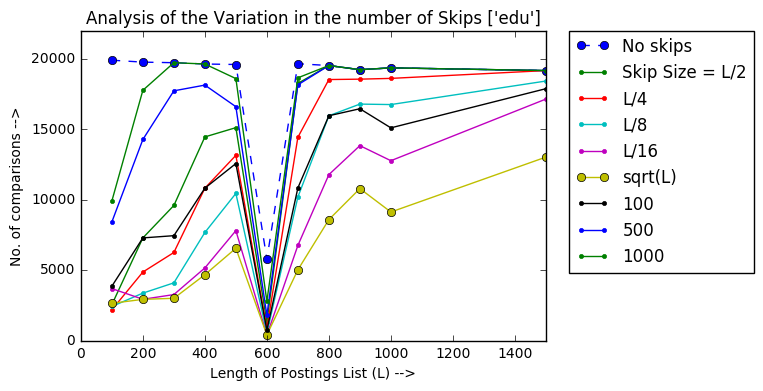

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt

fp = open(r"C:/Users/Sanidhya/Documents/IR_HW_1/results_max.txt", 'r')

x1 = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y6 = []
y7 = []
y8 = []
y9 = []
y10 = []

for line in fp:
    t = line.split()
    if (int(t[0])%100 == 0):
        x1.append(t[0])
        y1.append(t[1])
        y2.append(t[2])
        y3.append(t[3])
        y4.append(t[4])
        y5.append(t[5])
        y6.append(t[6])
        y7.append(t[7])
        y8.append(t[8])
        y9.append(t[9])
#         y10.append(t[10])

plt.title("Analysis of the Variation in the number of Skips ['edu']")
plt.plot(x1, y1, '--o', x1, y2, '.-', x1, y3, '.-', x1, y4, '.-', x1, y5, '.-', x1, y6, 'o-', x1, y7, '.-', x1, y8, '.-', x1, y9, '.-')
plt.legend(['No skips', 'Skip Size = L/2' , 'L/4', 'L/8', 'L/16', 'sqrt(L)', '100', '500', '1000'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0, 1500, 0, 22000])
plt.xlabel("Length of Postings List (L) -->")
plt.ylabel("No. of comparisons -->")
# plt.figure()
# plt.show()
plt.savefig(r"C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\analysis_max.png", bbox_inches="tight")

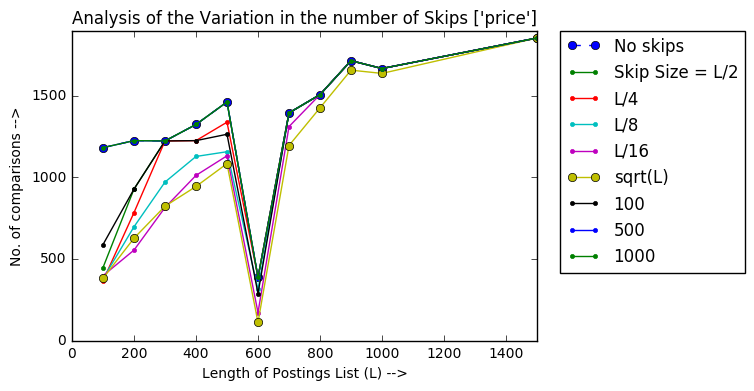

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

fp = open(r"C:/Users/Sanidhya/Documents/IR_HW_1/results_mean.txt", 'r')

x1 = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y6 = []
y7 = []
y8 = []
y9 = []
y10 = []

for line in fp:
    t = line.split()
    if (int(t[0])%100 == 0):
        x1.append(t[0])
        y1.append(t[1])
        y2.append(t[2])
        y3.append(t[3])
        y4.append(t[4])
        y5.append(t[5])
        y6.append(t[6])
        y7.append(t[7])
        y8.append(t[8])
        y9.append(t[9])
#         y10.append(t[10])

plt.title("Analysis of the Variation in the number of Skips ['price']")
plt.plot(x1, y1, '--o', x1, y2, '.-', x1, y3, '.-', x1, y4, '.-', x1, y5, '.-', x1, y6, 'o-', x1, y7, '.-', x1, y8, '.-', x1, y9, '.-')
plt.legend(['No skips', 'Skip Size = L/2' , 'L/4', 'L/8', 'L/16', 'sqrt(L)', '100', '500', '1000'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0, 1500, 0, 1900])
plt.xlabel("Length of Postings List (L) -->")
plt.ylabel("No. of comparisons -->")
# plt.figure()
# plt.show()
plt.savefig(r"C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\analysis_mean.png", bbox_inches="tight")

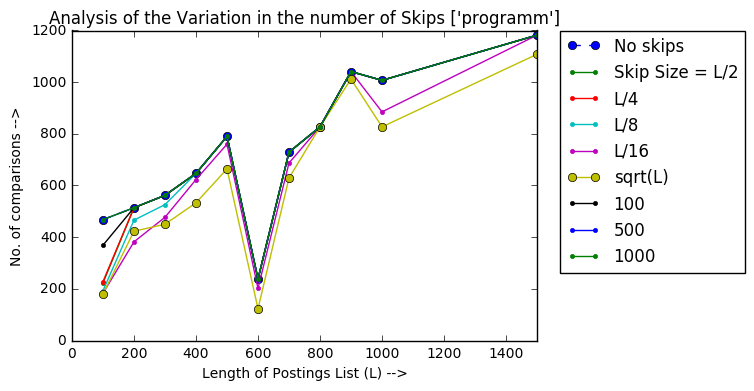

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

fp = open(r"C:/Users/Sanidhya/Documents/IR_HW_1/results_median.txt", 'r')

x1 = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y6 = []
y7 = []
y8 = []
y9 = []
y10 = []

for line in fp:
    t = line.split()
    if (int(t[0])%100 == 0):
        x1.append(t[0])
        y1.append(t[1])
        y2.append(t[2])
        y3.append(t[3])
        y4.append(t[4])
        y5.append(t[5])
        y6.append(t[6])
        y7.append(t[7])
        y8.append(t[8])
        y9.append(t[9])
#         y10.append(t[10])

plt.title("Analysis of the Variation in the number of Skips ['programm']")
plt.plot(x1, y1, '--o', x1, y2, '.-', x1, y3, '.-', x1, y4, '.-', x1, y5, '.-', x1, y6, 'o-', x1, y7, '.-', x1, y8, '.-', x1, y9, '.-')
plt.legend(['No skips', 'Skip Size = L/2' , 'L/4', 'L/8', 'L/16', 'sqrt(L)', '100', '500', '1000'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0, 1500, 0, 1200])
plt.xlabel("Length of Postings List (L) -->")
plt.ylabel("No. of comparisons -->")
# plt.figure()
# plt.show()
plt.savefig(r"C:\Users\Sanidhya\Documents\IR_HW_1\Dataset\analysis_median.png", bbox_inches="tight")
